# Deflategate study

In [1]:
import pandas as pd

In [2]:
football = pd.read_csv('https://raw.githubusercontent.com/datascienceforall/dsfa-2018sp-public/master/textbook/football.csv')

football

,Team,Ball,Blakeman,Prioleau
0,0,Patriots 1,11.50,11.80
1,0,Patriots 2,10.85,11.20
2,0,Patriots 3,11.15,11.50
3,0,Patriots 4,10.70,11.00
4,0,Patriots 5,11.10,11.45
5,0,Patriots 6,11.60,11.95
6,0,Patriots 7,11.85,12.30
7,0,Patriots 8,11.10,11.55
8,0,Patriots 9,10.95,11.35
9,0,Patriots 10,10.50,10.90


In [3]:
football.drop('Team',axis=1,inplace=True)
football

,Ball,Blakeman,Prioleau
0,Patriots 1,11.50,11.80
1,Patriots 2,10.85,11.20
2,Patriots 3,11.15,11.50
3,Patriots 4,10.70,11.00
4,Patriots 5,11.10,11.45
5,Patriots 6,11.60,11.95
6,Patriots 7,11.85,12.30
7,Patriots 8,11.10,11.55
8,Patriots 9,10.95,11.35
9,Patriots 10,10.50,10.90


In [4]:
football['Combined'] = football[['Blakeman', 'Prioleau']].mean(axis=1)

In [5]:
football

,Ball,Blakeman,Prioleau,Combined
0,Patriots 1,11.50,11.80,11.650
1,Patriots 2,10.85,11.20,11.025
2,Patriots 3,11.15,11.50,11.325
3,Patriots 4,10.70,11.00,10.850
4,Patriots 5,11.10,11.45,11.275
5,Patriots 6,11.60,11.95,11.775
6,Patriots 7,11.85,12.30,12.075
7,Patriots 8,11.10,11.55,11.325
8,Patriots 9,10.95,11.35,11.150
9,Patriots 10,10.50,10.90,10.700


In [6]:
patriots = football[football['Ball'].str.contains('Patriots')]
patriots

,Ball,Blakeman,Prioleau,Combined
0,Patriots 1,11.50,11.80,11.650
1,Patriots 2,10.85,11.20,11.025
2,Patriots 3,11.15,11.50,11.325
3,Patriots 4,10.70,11.00,10.850
4,Patriots 5,11.10,11.45,11.275
5,Patriots 6,11.60,11.95,11.775
6,Patriots 7,11.85,12.30,12.075
7,Patriots 8,11.10,11.55,11.325
8,Patriots 9,10.95,11.35,11.150
9,Patriots 10,10.50,10.90,10.700


In [7]:
patriots['Drop'] = 12.5 - patriots['Combined']
patriots

<ipython-input-7-f4edef056168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patriots['Drop'] = 12.5 - patriots['Combined']


,Ball,Blakeman,Prioleau,Combined,Drop
0,Patriots 1,11.50,11.80,11.650,0.850
1,Patriots 2,10.85,11.20,11.025,1.475
2,Patriots 3,11.15,11.50,11.325,1.175
3,Patriots 4,10.70,11.00,10.850,1.650
4,Patriots 5,11.10,11.45,11.275,1.225
5,Patriots 6,11.60,11.95,11.775,0.725
6,Patriots 7,11.85,12.30,12.075,0.425
7,Patriots 8,11.10,11.55,11.325,1.175
8,Patriots 9,10.95,11.35,11.150,1.350
9,Patriots 10,10.50,10.90,10.700,1.800


In [8]:
colts = football[football['Ball'].str.contains('Colts')]
colts

,Ball,Blakeman,Prioleau,Combined
11,Colts 1,12.70,12.35,12.525
12,Colts 2,12.75,12.30,12.525
13,Colts 3,12.50,12.95,12.725
14,Colts 4,12.55,12.15,12.350


In [9]:
colts['Drop'] = 13.0 - colts['Combined']
colts

<ipython-input-9-e2a91d777b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colts['Drop'] = 13.0 - colts['Combined']


,Ball,Blakeman,Prioleau,Combined,Drop
11,Colts 1,12.70,12.35,12.525,0.475
12,Colts 2,12.75,12.30,12.525,0.475
13,Colts 3,12.50,12.95,12.725,0.275
14,Colts 4,12.55,12.15,12.350,0.650


In [10]:
patriots_mean = patriots['Drop'].mean()
colts_mean = colts['Drop'].mean()


Test Statistic

In [11]:
observed_statistic = patriots_mean - colts_mean
observed_statistic

0.733522727272728

Predicting the Statistic Under the Null Hypothesis

In [12]:
import numpy as np

drops = patriots['Drop'].append(colts['Drop'])
drops

0     0.850
1     1.475
2     1.175
3     1.650
4     1.225
5     0.725
6     0.425
7     1.175
8     1.350
9     1.800
10    1.375
11    0.475
12    0.475
13    0.275
14    0.650
Name: Drop, dtype: float64

In [13]:
n=drops.count()

drops.sample(n,replace=False)

8     1.350
2     1.175
6     0.425
11    0.475
3     1.650
0     0.850
7     1.175
10    1.375
9     1.800
4     1.225
12    0.475
13    0.275
1     1.475
14    0.650
5     0.725
Name: Drop, dtype: float64

In [14]:
shuffled = drops.sample(n=15,replace=False)

new_patriots = shuffled.take(np.arange(11))
new_patriots_mean = new_patriots.mean()

new_colts = shuffled.take(np.arange(11, n))
new_colts_mean = new_colts.mean()

simulated_stat = new_patriots_mean - new_colts_mean
simulated_stat

0.23920454545454528

Permutation Test

In [15]:
simulated_statistics = []
repetitions = 10000

for i in np.arange(repetitions):
    shuffled = drops.sample(n,replace=False)
    new_patriots_mean = shuffled.take(np.arange(11)).mean()
    new_colts_mean = shuffled.take(np.arange(11, n)).mean()
    new_statistic = new_patriots_mean - new_colts_mean
    simulated_statistics = np.append(simulated_statistics, new_statistic)

Conclusion

In [16]:
empirical_P = np.count_nonzero(simulated_statistics >= observed_statistic)/repetitions
empirical_P

0.0025

In [17]:
print('Observed Statistic:', observed_statistic)
print('Empirical P:', empirical_P)


Observed Statistic: 0.733522727272728
Empirical P: 0.0025


In [18]:
simulated_statistics

array([ 0.11988636, -0.15284091,  0.1625    , ..., -0.16988636,
       -0.06761364,  0.03465909])

Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

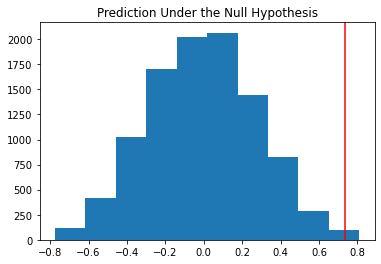

In [22]:
import matplotlib.pyplot as plt

plt.hist(simulated_statistics)
plt.axvline(observed_statistic, color='red')
plt.title('Prediction Under the Null Hypothesis')

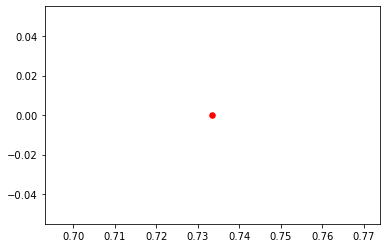

In [20]:
plt.scatter(observed_statistic, 0, color='red', s=30)